In [28]:
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
import wordcloud
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re  
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


In [4]:
# Import datasets
print("Loading data")
df_squidgame = pd.read_csv('../data/df_squidgame_labeled.csv')
df_netflix = pd.read_csv('../data/df_netflix_labeled.csv')
df_theguilty = pd.read_csv('../data/df_theguilty_labeled.csv')
df_midnightmass = pd.read_csv('../data/df_midnightmass_labeled.csv')
df_maid = pd.read_csv('../data/df_maid_labeled.csv')

Loading data


In [9]:
df_squidgame
df_netflix
df_theguilty
df_midnightmass
df_maid

,tweet,username,likes_count,date,sentiment2cat,sentiment3cat
0,possible hot take but i love that nate did not...,jess_ca98,0,2021-10-13,pos,pos
1,bathroom scene maid,yyznaho,0,2021-10-13,pos,neu
2,just watched series episode s | e of maid! mai...,jaykarwolfe,0,2021-10-13,pos,neu
3,i just know this girl not in this lady house d...,chipotlemyfavv,0,2021-10-13,pos,pos
4,i've just watched episode s | e of maid! maid ...,londonxmermaid,0,2021-10-13,pos,neu
...,...,...,...,...,...,...
3128,just finished maid on netflix. highly recommen...,yukett,0,2021-10-04,pos,pos
3129,maid episode recap tv margaretqualley bjharri...,reelmockery,0,2021-10-04,pos,neu
3130,i started watching maid two days ago and i hon...,rossydntcatchon,0,2021-10-04,pos,pos
3131,i’m so stressed out omg i hate this maid,ayuune,0,2021-10-04,neg,neg


## Working with df_squidgame

In [10]:
df_netflix

,tweet,username,likes_count,date,sentiment2cat,sentiment3cat
0,aged pretty well. comments youtube yt lgbt bla...,creativegene1,0,2021-10-13,pos,pos
1,is it just me or is it weird af when an adult ...,vibewithlo,0,2021-10-13,neg,neg
2,have you seen “amend: the fight for america” o...,lawrencehnyc,0,2021-10-13,pos,neg
3,squid game is officially netflix is 'biggest e...,pulseghana,3,2021-10-13,neg,neu
4,cowboybebop anime set to release on netflix in...,cloutnewsmedia,0,2021-10-13,pos,pos
...,...,...,...,...,...,...
3451,october is chock-full of content on netflix. h...,bms_buzz,0,2021-10-12,pos,neu
3452,"key features -syinix tv -"" inch -k uhd resolut...",scartek254,2,2021-10-12,pos,pos
3453,we’re stoked that under has been added to the ...,iv4band,4,2021-10-12,pos,pos
3454,lite releases the soundtrack for the today rel...,musicchannel_j,2,2021-10-12,pos,pos


In [39]:
df_netflix.username.value_counts()
df_squidgame.username.value_counts()

latersbaby1994    130
havingalaff3      110
xlolaxhydrix       88
realkdpfan4eva     82
the_oddglass       33
                 ... 
jordialtimira       1
lokomotivuzb        1
__vidyaaaa          1
pammy_travel        1
dovehawkin          1
Name: username, Length: 18955, dtype: int64

In [29]:

def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=50,
        max_font_size=200).generate(all_words)

    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

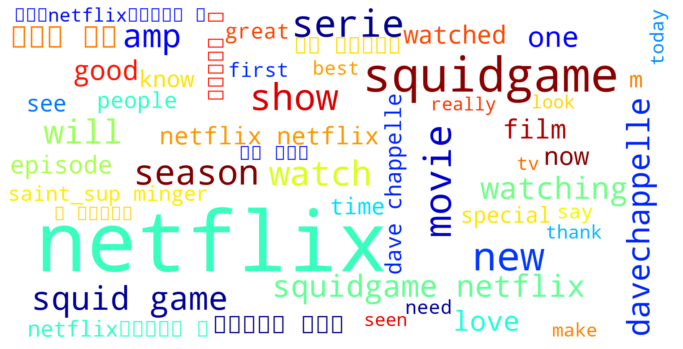

In [30]:
#Positive - Netflix dataset
tw_netflix_pos = df_netflix[df_netflix['sentiment2cat'] == 'pos']['tweet']
word_cloud(tw_netflix_pos)

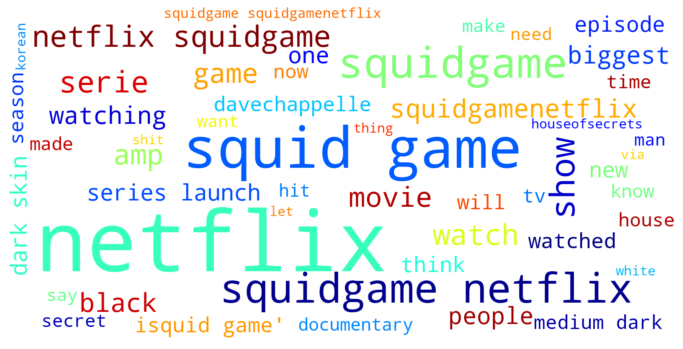

In [31]:
tw_netflix_neg = df_netflix[df_netflix['sentiment2cat'] == 'neg']['tweet']
word_cloud(tw_netflix_neg)

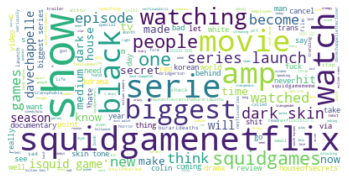

In [33]:
all_text = " ".join(rev for rev in tw_netflix_neg)
stop_words = ["squidgame", "squid game", "netflix", 'squid', 'game'] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
def get_sentiment(df):
    df_pos = df[df['sentiment2cat'] == 'pos']
    df_neg = df[df['sentiment2cat'] == 'neg']
    print("Number of Positive Tweets ", len(df_pos))
    print("Number of Negative Tweets ", len(df_neg))
    sns.set()
    labels = ['Postive', 'Negative']
    heights = [len(df_pos), len(df_neg)]
    sns.barplot(labels, heights)
    sns.title('With the hashtag ', )


Number of Positive Tweets  17201
Number of Negative Tweets  6755


/Users/minhhienvo/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


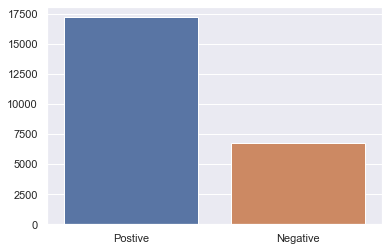

In [56]:
get_sentiment(df_squidgame)

Number of Positive Tweets  2718
Number of Negative Tweets  738


/Users/minhhienvo/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


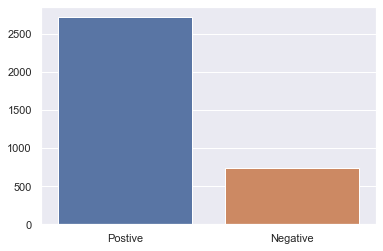

In [57]:
get_sentiment(df_netflix)

In [49]:
# df_squidgame
# df_netflix
# df_theguilty
# df_midnightmass
# df_maid
df_list = {'df_squidgame','df_netflix', 'df_theguilty', 'df_midnightmass', 'df_maid'}
for df in df_list.keys():
    print("Plot of", df)
    print(get_sentiment(df))

AttributeError: 'set' object has no attribute 'keys'